# Алгоритм:
##### 1. читаем данные, оставляем те, где плотность > 80%, базовые статистики, форматы данных
##### 2. видуализации и гипотезы

# 1. читаем данные, оставляем те, где плотность > 80%, базовые статистики, форматы данных

In [425]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [426]:
URL = 'C:/Users/vokea/OneDrive/Рабочий стол/Mishin/Новая папка/googleplaystore.csv'
df = pd.read_csv(URL, sep=',')
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [427]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [428]:
print(df.shape)

(10841, 13)


In [429]:
df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [430]:
top_5_category = df.Category.value_counts().sort_values(ascending = False).head(5).index.values
top_5_category

array(['FAMILY', 'GAME', 'TOOLS', 'MEDICAL', 'BUSINESS'], dtype=object)

In [431]:
rating_by_category = df[df.Category.isin(top_5_category)].pivot_table(
                        index='Rating', 
                        columns='Category', 
                        values='App', 
                        aggfunc=len).fillna(0)
rating_by_category

Category,BUSINESS,FAMILY,GAME,MEDICAL,TOOLS
Rating,,,,,
1.0,1.0,3.0,1.0,3.0,3.0
1.4,0.0,0.0,1.0,0.0,1.0
1.6,0.0,1.0,0.0,0.0,1.0
1.7,1.0,2.0,0.0,0.0,1.0
1.8,0.0,2.0,0.0,1.0,1.0
1.9,0.0,3.0,0.0,0.0,2.0
2.0,1.0,1.0,0.0,1.0,2.0
2.1,1.0,0.0,0.0,0.0,2.0
2.2,0.0,1.0,0.0,0.0,5.0


In [432]:
import seaborn as sns

## heatmap

<AxesSubplot:xlabel='Category', ylabel='Rating'>

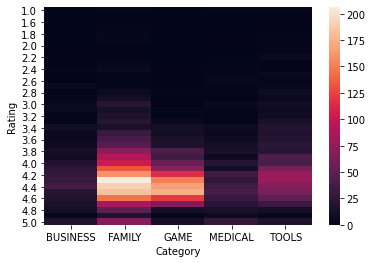

In [433]:
sns.heatmap(rating_by_category)

#### *Гипотеза: большинство приложений из категории Family, Games, Tools имеют визуально высокий рейтинг*

## Столбчатая диаграмма

In [434]:
price_by_category = df[['Category', 'Price']].groupby('Category').count()
price_by_category.head()

,Price
Category,
1.9,1
ART_AND_DESIGN,65
AUTO_AND_VEHICLES,85
BEAUTY,53
BOOKS_AND_REFERENCE,231


<AxesSubplot:title={'center':'Sum Price by top-5 category'}, xlabel='Category', ylabel='Price'>

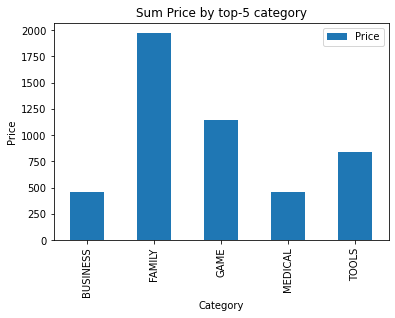

In [435]:
price_by_category.loc[['BUSINESS', 'FAMILY', 'GAME', 'MEDICAL', 'TOOLS']].plot(kind='bar', 
                                                                  title='Sum Price by top-5 category',
                                                                  xlabel='Category',
                                                                  ylabel='Price')

<AxesSubplot:title={'center':'Sum Price by top-5 category'}, xlabel='Category', ylabel='Price'>

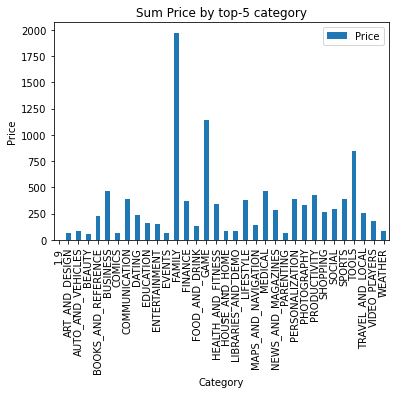

In [436]:
price_by_category.plot(kind='bar', 
                       title='Sum Price by top-5 category',
                       xlabel='Category',
                       ylabel='Price')

#### *Максимальные продажи суммарно по категориям: Family, Games, Tools*

## График

In [455]:
def Updated_year(param):
    return str(param)[-4:]
df['Last Updated year'] = df['Last Updated'].apply(Updated_year)
df.tail(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Updated year
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device,2015
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device,2018


In [456]:
rating_by_year = df[df.Category.isin(top_5_category)].pivot_table(
                        index='Last Updated year', 
                        columns='Category', 
                        values='App', 
                        aggfunc=len).fillna(0)
rating_by_year

Category,BUSINESS,FAMILY,GAME,MEDICAL,TOOLS
Last Updated year,,,,,
2010,0.0,1.0,0.0,0.0,0.0
2011,1.0,1.0,4.0,0.0,6.0
2012,1.0,9.0,2.0,3.0,3.0
2013,4.0,17.0,18.0,7.0,10.0
2014,7.0,41.0,26.0,15.0,26.0
2015,24.0,103.0,62.0,18.0,49.0
2016,38.0,211.0,80.0,24.0,75.0
2017,84.0,452.0,186.0,88.0,180.0
2018,301.0,1137.0,766.0,308.0,494.0


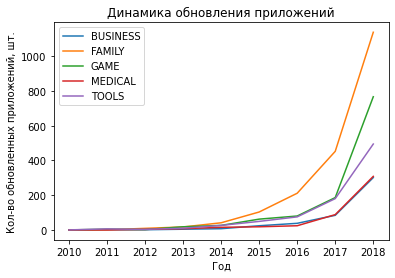

In [460]:
plt.plot(rating_by_year.index, rating_by_year.values)
plt.title('Динамика обновления приложений')
plt.xlabel('Год')
plt.ylabel('Кол-во обновленных приложений, шт.')
plt.legend(rating_by_year)

### *Датасет с 2018 года, предположительно большая часть приложений на тот момент актуально обновлялись, в категории FAMILY около 200 приложений обновлялись только в 2016 году. Для полного анализа не хватает информации по дате создания приложений.

## Area chart

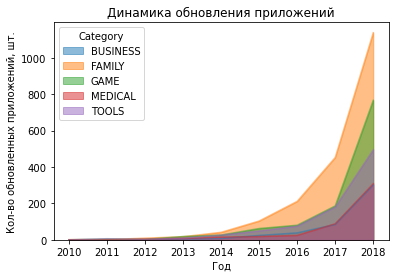

In [461]:
# по-умолчанию  Area chart всегда накопительный
ax = rating_by_year.plot(kind='area',
                        stacked=False,
                        title='Динамика обновления приложений', 
                        xlabel='Год', 
                        ylabel='Кол-во обновленных приложений, шт.')

## Круговая диаграмма

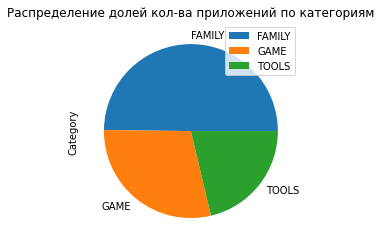

In [465]:
pie_data = df.Category.value_counts().sort_values(ascending = False).head(3)
ax = pie_data.plot(kind='pie',
                   title='Распределение долей кол-ва приложений по категориям')
ax.legend()

#### Приложения категории FAMILY визуально занимает около 50% от общей доли ТОП-3 категорий